In [1]:
import numpy as np
import os

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, AveragePooling2D, UpSampling2D, Reshape, Dropout,Conv2D,MaxPool2D,InputLayer,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

import h5py
import matplotlib.pyplot as plt
from PIL import Image
import cv2

import seaborn as sns
import pandas as pd

In [3]:
x_ = np.load('img_toughness.npy')

In [4]:
y_ = np.load('label_toughness.npy')

In [5]:
def plot_images(*images):
    fig, ax = plt.subplots(1, len(images), figsize=(3*len(images), 4))
    for a, i in zip(ax, images):
        im = a.imshow(np.squeeze(i), vmin=0, vmax=1)
        a.axis('off')

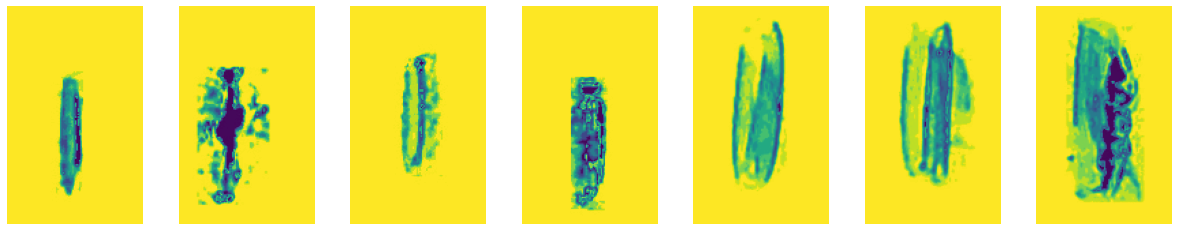

In [6]:
plot_images(x_[5],x_[9],x_[13],x_[17],x_[22],x_[26],x_[33])

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_.reshape((-1,160,100,1)), y_, test_size=0.18, random_state=60)


<AxesSubplot:>

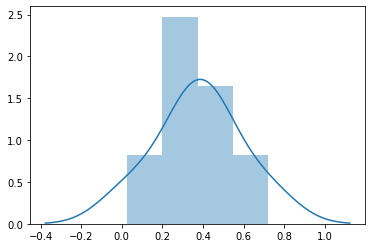

In [8]:
sns.distplot(y_test)

<AxesSubplot:>

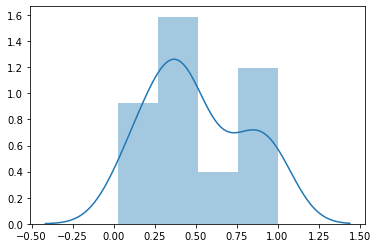

In [9]:
sns.distplot(y_train)

In [10]:
model = Sequential()
model.add(InputLayer(input_shape=(160, 100, 1)))

# 1st conv block
model.add(Conv2D(3, (5, 5), activation='sigmoid', strides=(1, 1), padding='same',kernel_regularizer=l2(0.001)))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
# 2nd conv block
model.add(Conv2D(3, (5, 5), activation='sigmoid', strides=(2, 2), padding='same',kernel_regularizer=l2(0.001)))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization())
#3rd conv block
model.add(Conv2D(5, (3, 3), activation='sigmoid', strides=(2, 2), padding='same',kernel_regularizer=l2(0.001)))
model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))
model.add(BatchNormalization())
# ANN block
model.add(Flatten())
model.add(Dense(units=16, activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dense(units=8, activation='relu',kernel_regularizer=l2(0.001)))
#model.add(Dropout(0.2))
# output layer
model.add(Dense(units=1, activation='sigmoid',kernel_regularizer=l2(0.001)))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 160, 100, 3)       78        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 80, 50, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 25, 3)         228       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 13, 3)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 20, 13, 3)         12        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 7, 5)          140       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 3, 5)           0

In [12]:
model.compile(optimizer=Adam(0.0005), loss='mse')

In [13]:
history = model.fit(
    x=x_train,
    y=y_train,
    validation_data=(x_test, y_test),
    epochs=1200,
    batch_size=20,
)

Epoch 1/1200
2/2 [==============================] - 1s 300ms/step - loss: 0.1464 - val_loss: 0.0887
Epoch 2/1200
2/2 [==============================] - 0s 40ms/step - loss: 0.1466 - val_loss: 0.0884
Epoch 3/1200
2/2 [==============================] - 0s 130ms/step - loss: 0.1295 - val_loss: 0.0882
Epoch 4/1200
2/2 [==============================] - 0s 40ms/step - loss: 0.1277 - val_loss: 0.0881
Epoch 5/1200
2/2 [==============================] - 0s 40ms/step - loss: 0.1242 - val_loss: 0.0879
Epoch 6/1200
2/2 [==============================] - 0s 41ms/step - loss: 0.1127 - val_loss: 0.0878
Epoch 7/1200
2/2 [==============================] - 0s 39ms/step - loss: 0.1187 - val_loss: 0.0877
Epoch 8/1200
2/2 [==============================] - 0s 42ms/step - loss: 0.1157 - val_loss: 0.0876
Epoch 9/1200
2/2 [==============================] - 0s 45ms/step - loss: 0.1141 - val_loss: 0.0875
Epoch 10/1200
2/2 [==============================] - 0s 46ms/step - loss: 0.1106 - val_loss: 0.0874
Epoch 1

In [14]:
train_number = 31
test_number = 7

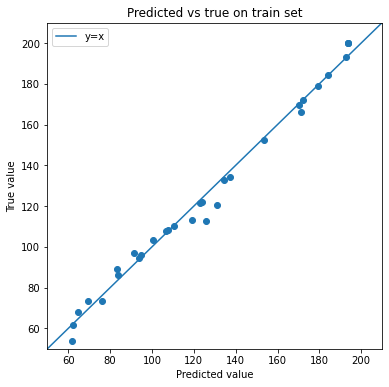

In [15]:
xaxis = np.linspace(50,220,100)
yaxis = xaxis
plt.figure(figsize=(6, 6))
plt.xlim([50,210])
plt.ylim([50,210])
plt.ylabel("True value")
plt.xlabel("Predicted value")
plt.plot(xaxis,yaxis,label = 'y=x')

plt.title("Predicted vs true on train set")
plt.scatter(50+(model.predict(x_train[:,:,:,]).reshape(train_number))*150,(y_train)*150+50)

plt.legend()

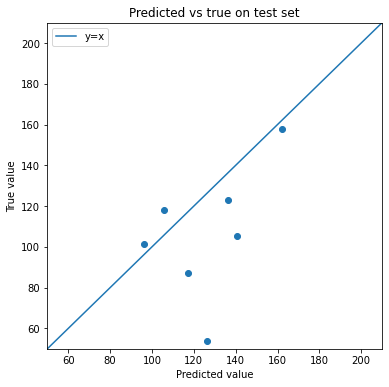

In [16]:
xaxis = np.linspace(50,220,100)
yy = xaxis
plt.figure(figsize=(6, 6))
plt.xlim([50,210])
plt.ylim([50,210])

plt.ylabel("True value")
plt.xlabel("Predicted value")
plt.plot(xaxis,yy,label = 'y=x')
plt.legend()
plt.title("Predicted vs true on test set")
plt.scatter(50+(model.predict(x_test[:,:,:,]).reshape(test_number))*150,(y_test)*150+50)

In [17]:
#model.save("CNN_toughness")